### Bibliotecas

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import os

### Importando base de dados

In [71]:
os.chdir('C:/Users/jean_/dev/github/EDA/Documents/database/')
diretorio_atual = os.getcwd()

df_sale = pd.read_csv('fb_prophet_train.csv', sep = ',', decimal = '.', parse_dates = ['Date'])
df_store = pd.read_csv('fb_prophet_store.csv', sep = ',', decimal = '.')

C:\Users\jean_\AppData\Local\Temp\ipykernel_12380\2808209199.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sale = pd.read_csv('fb_prophet_train.csv', sep = ',', decimal = '.', parse_dates = ['Date'])


In [72]:
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [73]:
df_sale.shape

(1017209, 9)

In [74]:
df_sale.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [75]:
df_sale['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [76]:
df_sale['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [77]:
df_sale['Open'].unique()

array([1, 0], dtype=int64)

In [78]:
df_sale['Promo'].unique()

array([1, 0], dtype=int64)

In [79]:
df_sale['StateHoliday'].unique()


array(['0', 'a', 'b', 'c', 0], dtype=object)

In [80]:
df_sale['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

In [81]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [82]:
df_store.shape

(1115, 10)

In [83]:
df_store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [84]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [85]:
df_store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [86]:
df_store['Promo2'].unique()

array([0, 1], dtype=int64)

### Análise de Dados

#### df_sale

In [87]:
df_sale.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [88]:
df_sale.describe()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,2014-04-11 01:30:42.846061824,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
min,1.000000e+00,1.000000e+00,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,2013-08-17 00:00:00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,2014-04-02 00:00:00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,2014-12-12 00:00:00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,2015-07-31 00:00:00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01


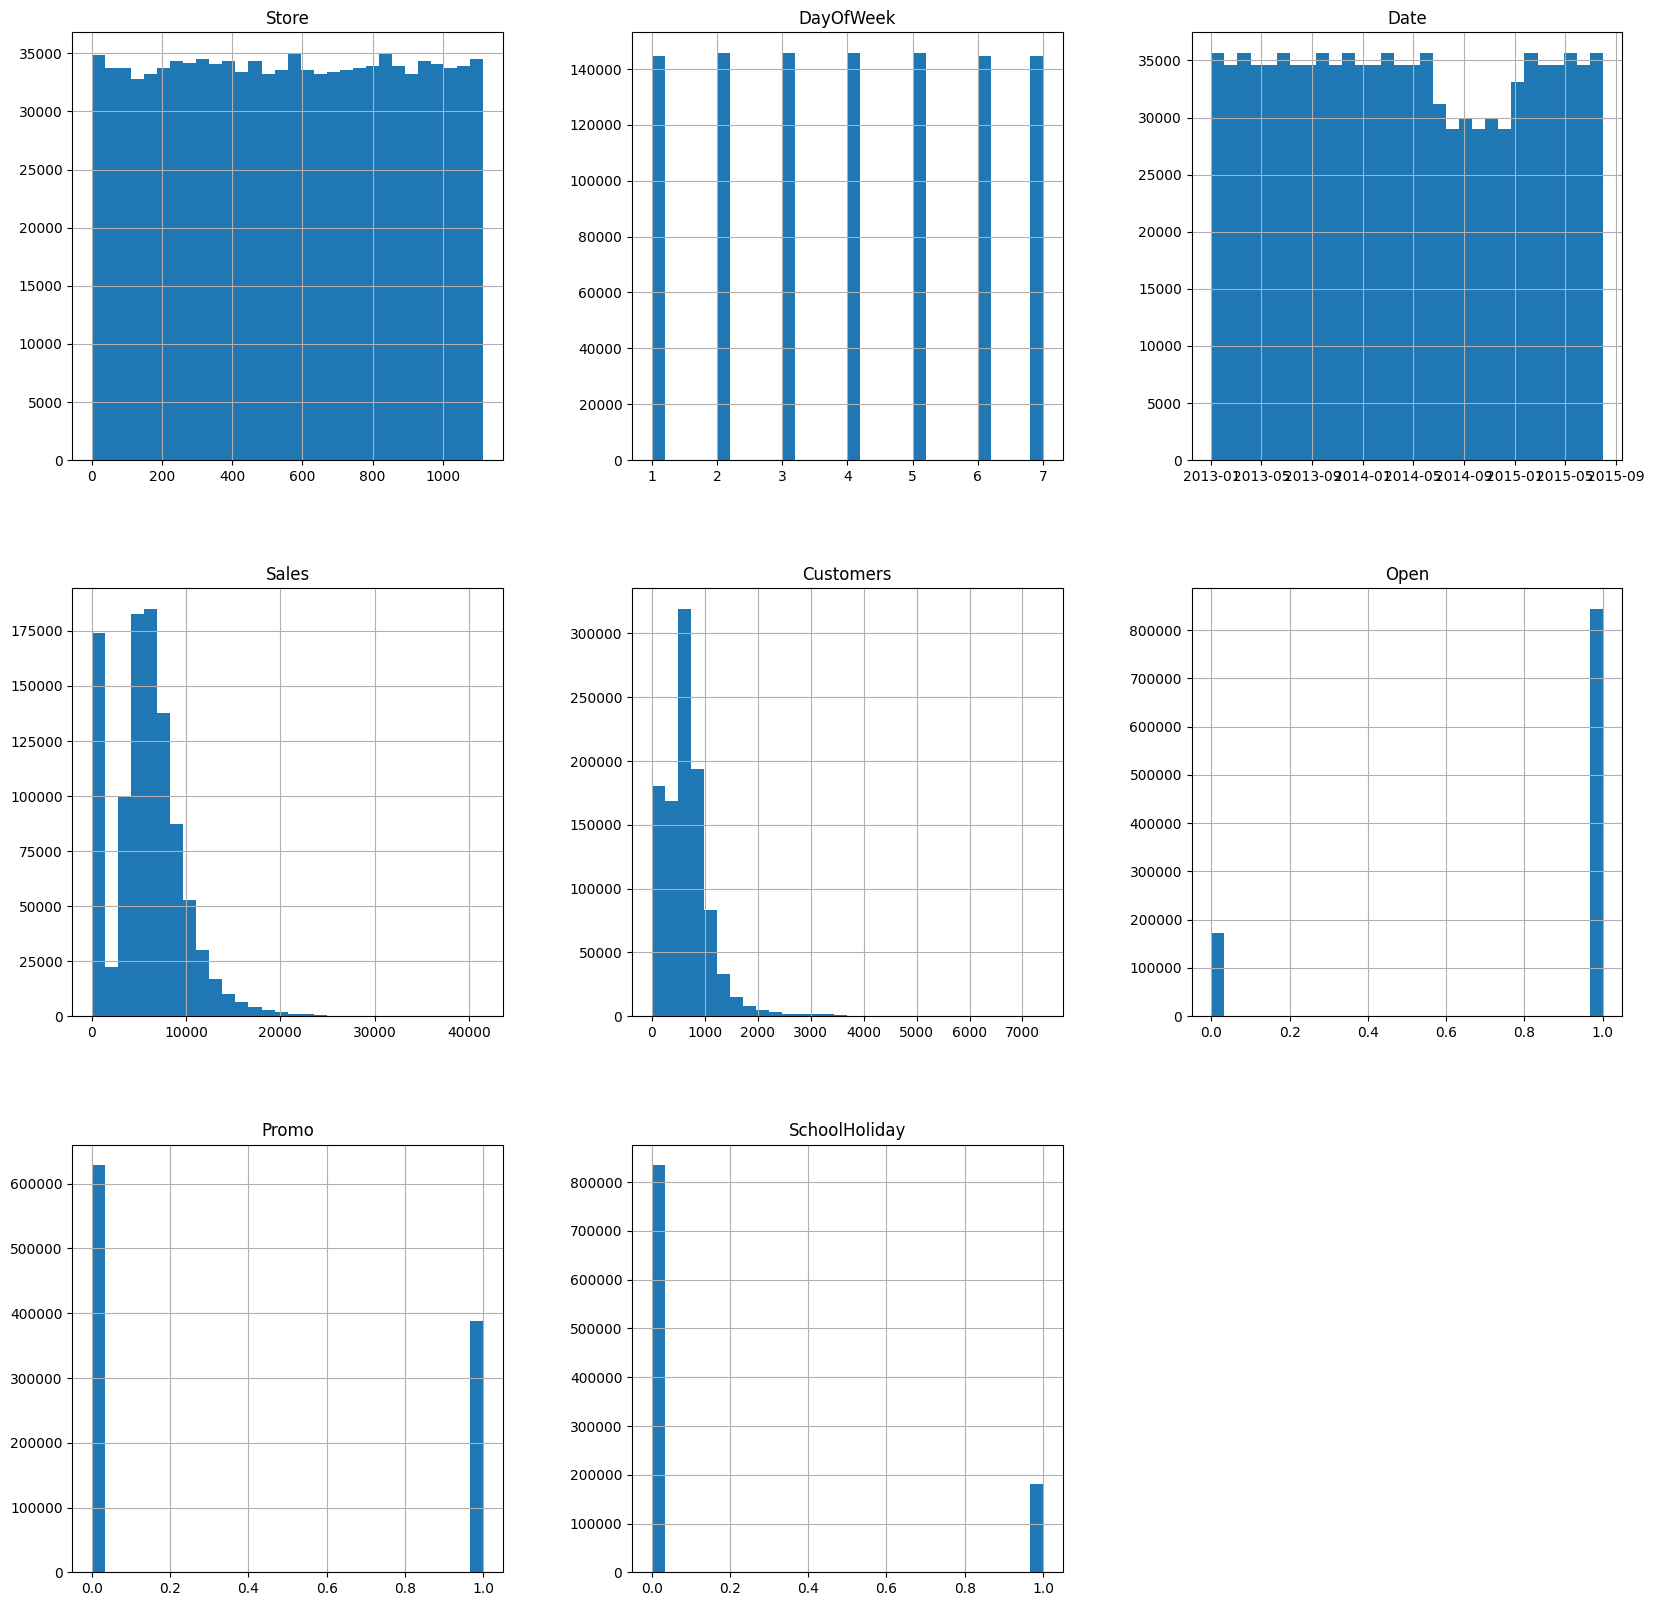

In [89]:
df_sale.hist(bins = 30, figsize = (20, 20));

In [90]:
dia_s_promo = df_sale['Promo'].value_counts()[0]
dia_c_promo = df_sale['Promo'].value_counts()[1]
dia_totais = df_sale['Promo'].value_counts().sum()

print('O total de dias sem promoção representam', format(dia_s_promo/dia_totais, '.2%'), 'dos dias analisados')
print('O total de dias com promoção representam', format(dia_c_promo/dia_totais, '.2%'), 'dos dias analisados')

O total de dias sem promoção representam 61.85% dos dias analisados
O total de dias com promoção representam 38.15% dos dias analisados


In [91]:
dia_fechado = df_sale['Open'].value_counts()[0]
dia_aberto = df_sale['Open'].value_counts()[1]
dia_totais = df_sale['Open'].value_counts().sum()

print('O total de dias fechados representam', format(dia_fechado/dia_totais, '.2%'), 'dos dias analisados')
print('O total de dias abertos representam', format(dia_aberto/dia_totais, '.2%'), 'dos dias analisados')
print('Cada loja ficou fechada, em média,', round(dia_fechado/len(df_store), 0))

O total de dias fechados representam 16.99% dos dias analisados
O total de dias abertos representam 83.01% dos dias analisados
Cada loja ficou fechada, em média, 155.0


In [92]:
df_sale_open = df_sale[df_sale['Open'] == 1]
df_sale_open.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [93]:
df_sale_open.drop(columns = {'Open'}, inplace = True)

C:\Users\jean_\AppData\Local\Temp\ipykernel_12380\3262450248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sale_open.drop(columns = {'Open'}, inplace = True)


In [94]:
df_sale_open.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [95]:
df_sale_open.describe()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,2014-04-11 01:02:42.487565056,6955.514291,762.728395,0.446352,0.193580
min,1.000000,1.000000,2013-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,2013-08-16 00:00:00,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,2014-03-31 00:00:00,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,2014-12-10 00:00:00,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,2015-07-31 00:00:00,41551.000000,7388.000000,1.000000,1.000000
std,321.731914,1.723689,NaN,3104.214680,401.227674,0.497114,0.395103


#### df_store

In [96]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [97]:
df_store[df_store['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [98]:
df_store[df_store['Promo2SinceWeek'].isnull()]['Promo2'].unique()

array([0], dtype=int64)

In [99]:
df_store[df_store['Promo2SinceWeek'].isnull()].index.difference(df_store[df_store['Promo2SinceYear'].isnull()].index)

Index([], dtype='int64')

In [100]:
df_store[df_store['Promo2SinceWeek'].isnull()].index.difference(df_store[df_store['PromoInterval'].isnull()].index)

Index([], dtype='int64')

In [101]:
coluna_faltante = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

for coluna in coluna_faltante:
    df_store[coluna].fillna(0, inplace = True)

In [102]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [103]:
df_store[df_store['CompetitionOpenSinceMonth'].isnull()].index.difference(df_store[df_store['CompetitionOpenSinceYear'].isnull()].index)

Index([], dtype='int64')

In [104]:
coluna_faltante = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

for coluna in coluna_faltante:
    df_store[coluna].fillna(0, inplace = True)

In [105]:
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [106]:
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].mean(), inplace = True)

In [107]:
df_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [108]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5404.901079,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,7652.849306,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,2330.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [109]:
dia_s_promo_2 = df_store['Promo2'].value_counts()[0]
dia_c_promo_2 = df_store['Promo2'].value_counts()[1]
dia_totais = df_store['Promo2'].value_counts().sum()

print('O total de dias sem promoção 2 representam', format(dia_s_promo_2/dia_totais, '.2%'), 'dos dias analisados')
print('O total de dias com promoção 2 representam', format(dia_c_promo_2/dia_totais, '.2%'), 'dos dias analisados')

O total de dias sem promoção 2 representam 48.79% dos dias analisados
O total de dias com promoção 2 representam 51.21% dos dias analisados


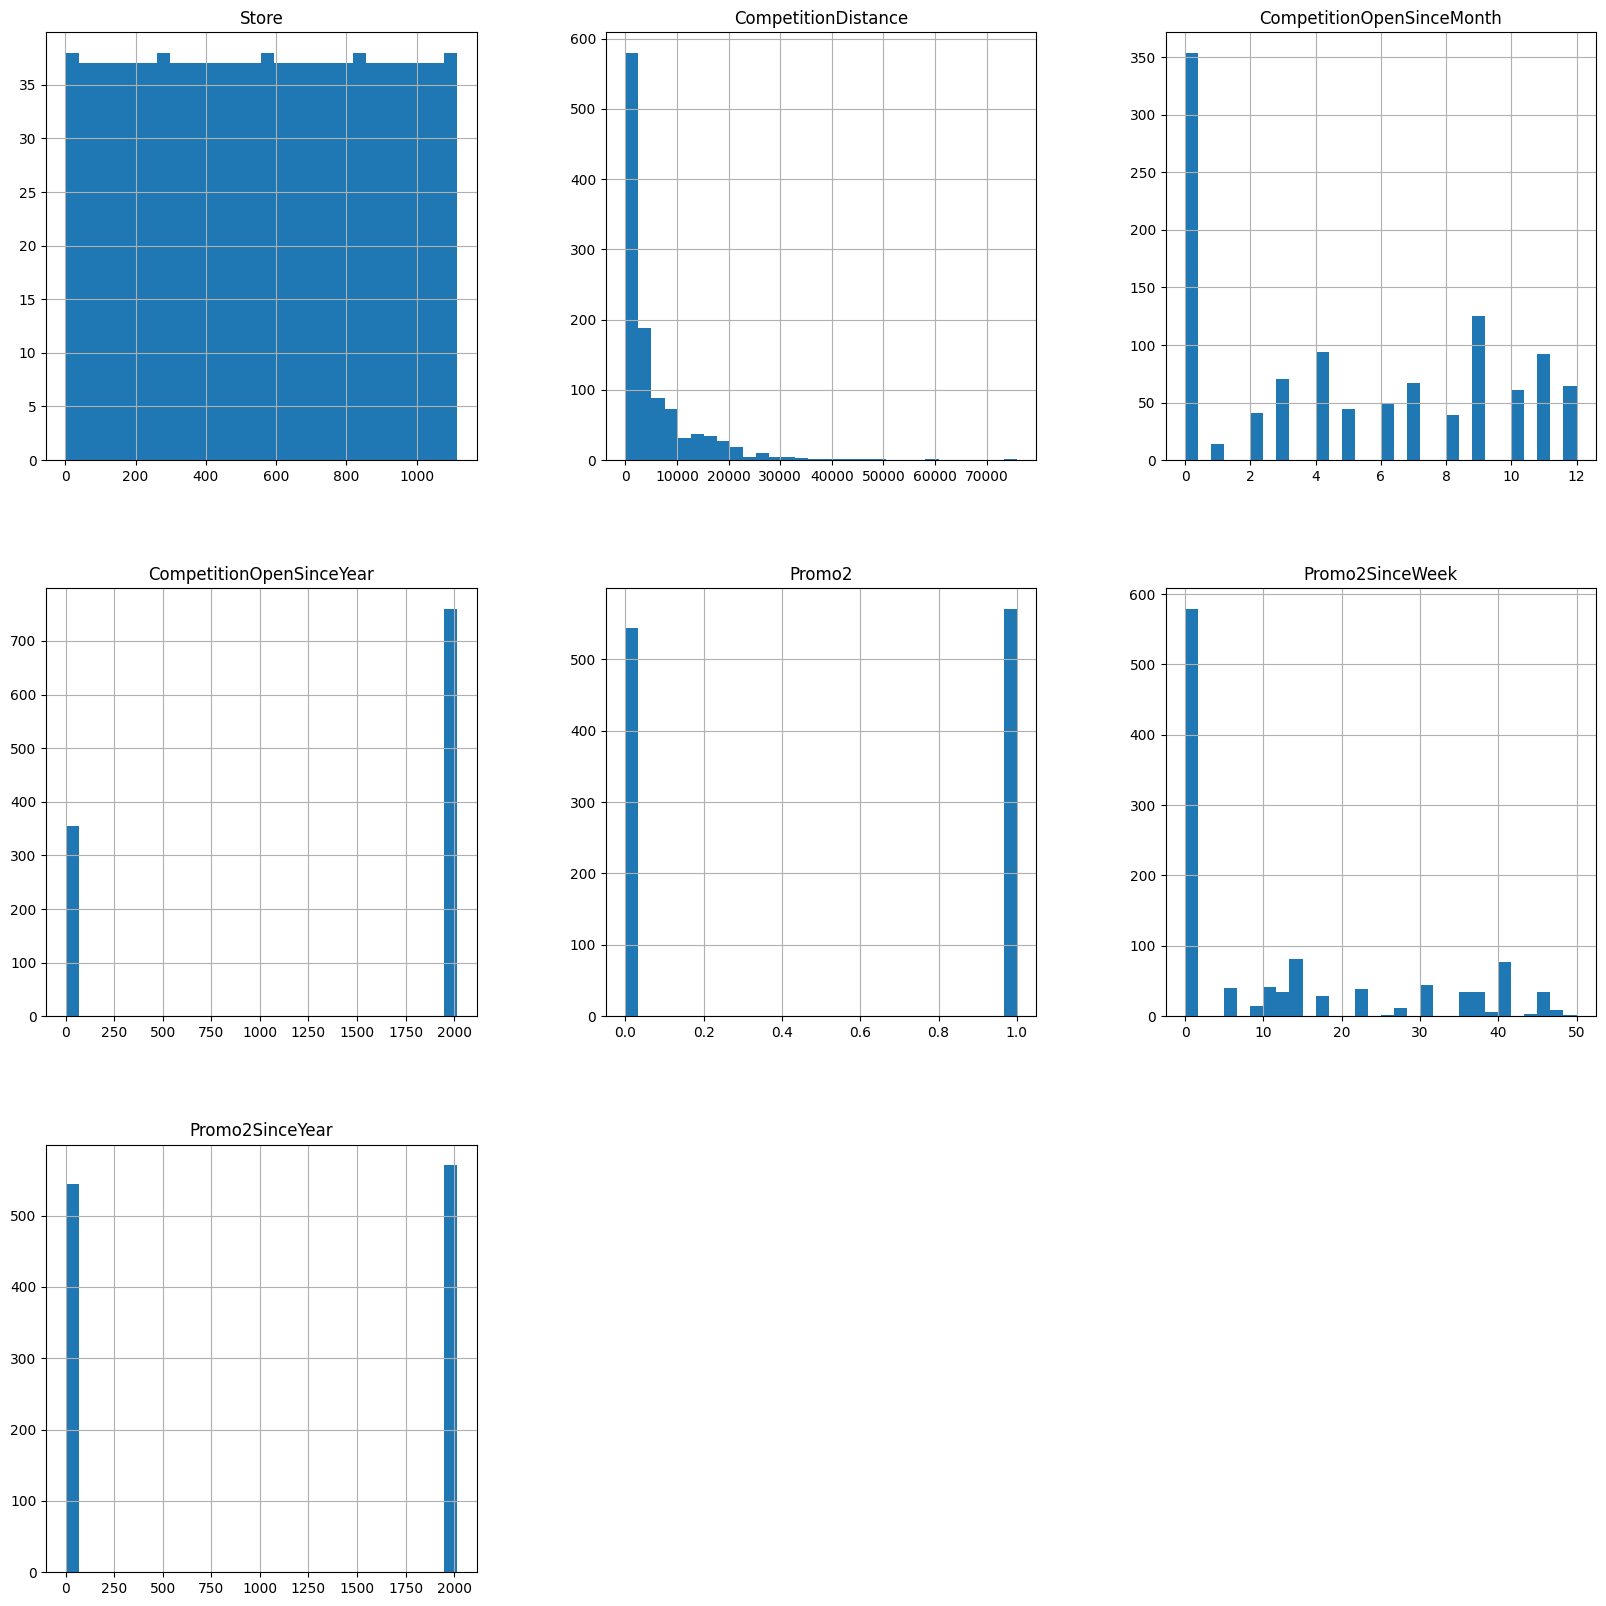

In [110]:
df_store.hist(bins = 30, figsize = (20, 20));

#### Juntando os Dataframes

In [111]:
df_final = pd.merge(df_sale_open, df_store, how = 'inner', on = 'Store')

In [112]:
df_final.shape

(844392, 17)

In [113]:
df_final.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [114]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  844392 non-null  float64 

<Axes: >

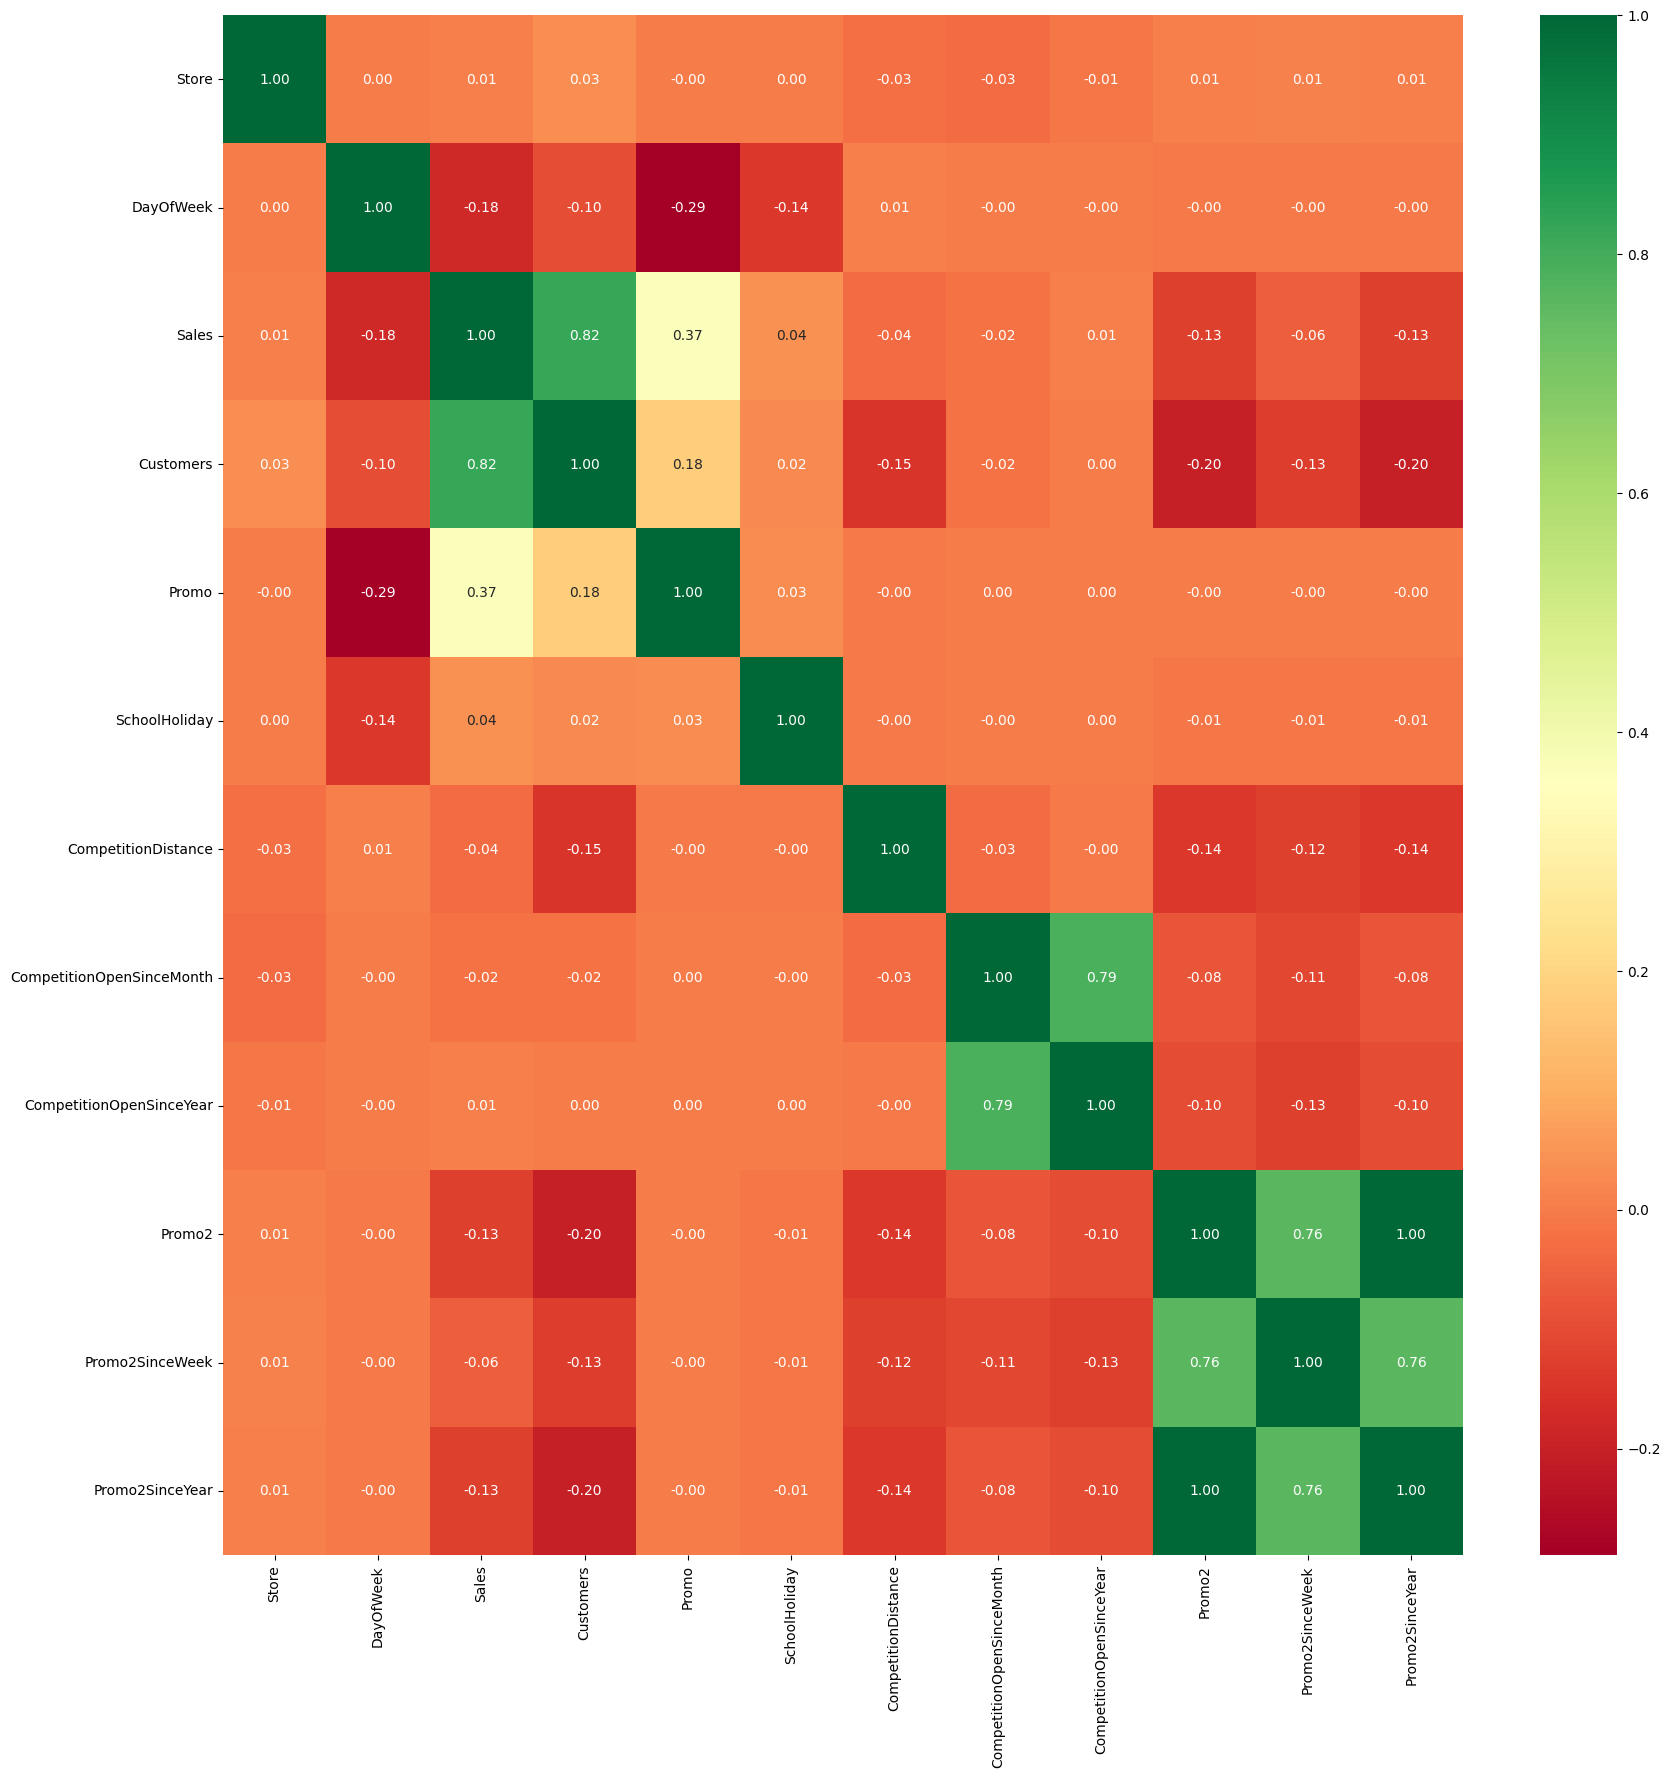

In [115]:
matriz_correlacao = df_final.select_dtypes(include = ['float', 'int']).corr()
fig, ax = plt.subplots(figsize = (20, 20))

sns.heatmap(matriz_correlacao, annot = True, cmap = "RdYlGn", fmt = '.2f')

In [116]:
df_final.select_dtypes(include = ['float', 'int']).corr()['Sales'].sort_values(ascending = False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
SchoolHoliday                0.038617
Store                        0.007710
CompetitionOpenSinceYear     0.005266
CompetitionOpenSinceMonth   -0.018370
CompetitionDistance         -0.036343
Promo2SinceWeek             -0.058476
Promo2                      -0.127596
Promo2SinceYear             -0.127621
DayOfWeek                   -0.178736
Name: Sales, dtype: float64

In [117]:
df_final['Year'] = pd.DatetimeIndex(df_final['Date']).year
df_final['Month'] = pd.DatetimeIndex(df_final['Date']).month
df_final['Day'] = pd.DatetimeIndex(df_final['Date']).day

In [118]:
df_final.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


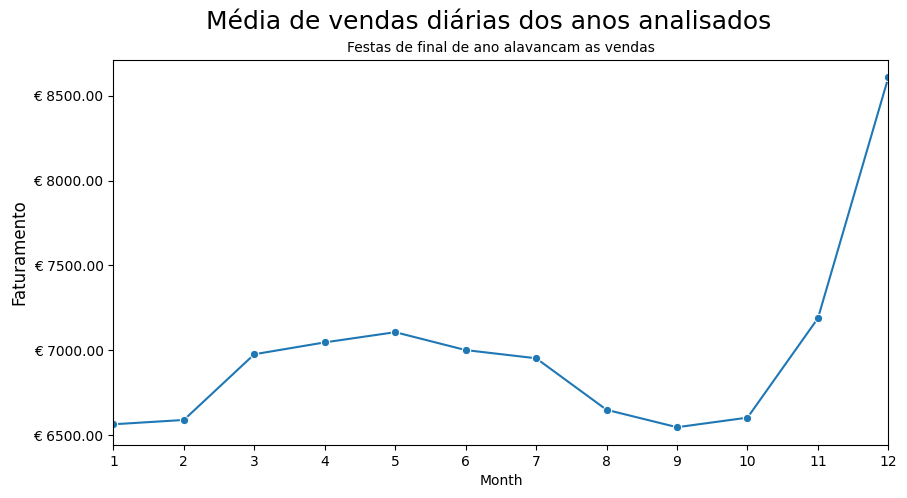

In [119]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(df_final.groupby(['Month'])[['Sales']].mean(), marker = 'o', markersize = 6)
plt.suptitle('Média de vendas diárias dos anos analisados', fontsize = 18);
plt.title('Festas de final de ano alavancam as vendas', fontsize = 10);
plt.legend().remove()
ax.set_xlim(1, 12);
ax.set_xticks(range(1,13));
ax.set_ylabel('Faturamento', fontsize = 12);
ax.yaxis.set_major_formatter('€ {x:1.2f}')


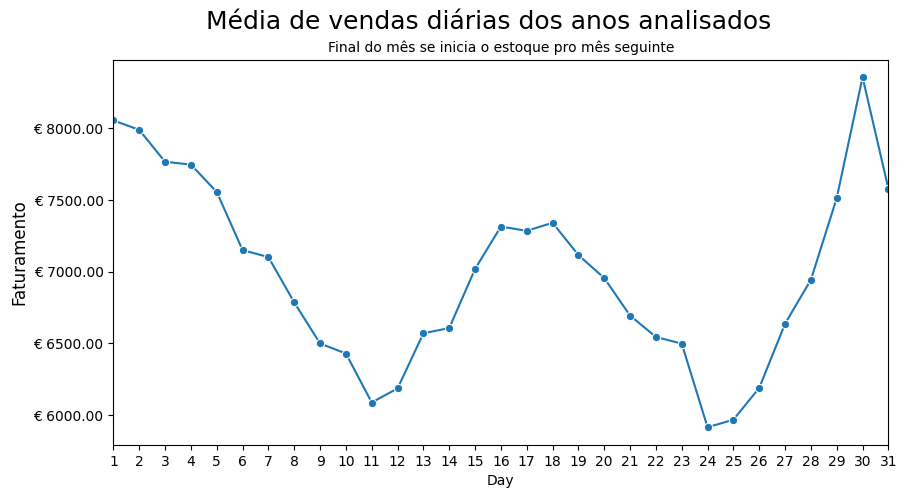

In [120]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(df_final.groupby(['Day'])[['Sales']].mean(), marker = 'o', markersize = 6)
plt.suptitle('Média de vendas diárias dos anos analisados', fontsize = 18);
plt.title('Final do mês se inicia o estoque pro mês seguinte', fontsize = 10);
plt.legend().remove()
ax.set_xlim(1, 31);
ax.set_xticks(range(1,32));
ax.set_ylabel('Faturamento', fontsize = 12);
ax.yaxis.set_major_formatter('€ {x:1.2f}')

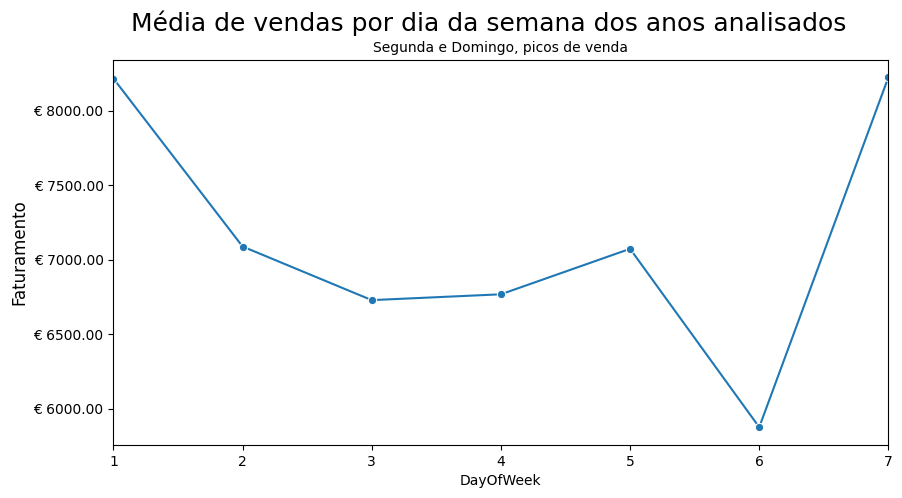

In [121]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(df_final.groupby(['DayOfWeek'])[['Sales']].mean(), marker = 'o', markersize = 6)
plt.suptitle('Média de vendas por dia da semana dos anos analisados', fontsize = 18);
plt.title('Segunda e Domingo, picos de venda', fontsize = 10);
plt.legend().remove()
ax.set_xlim(1, 7);
ax.set_xticks(range(1,8));
ax.set_ylabel('Faturamento', fontsize = 12);
ax.yaxis.set_major_formatter('€ {x:1.2f}')

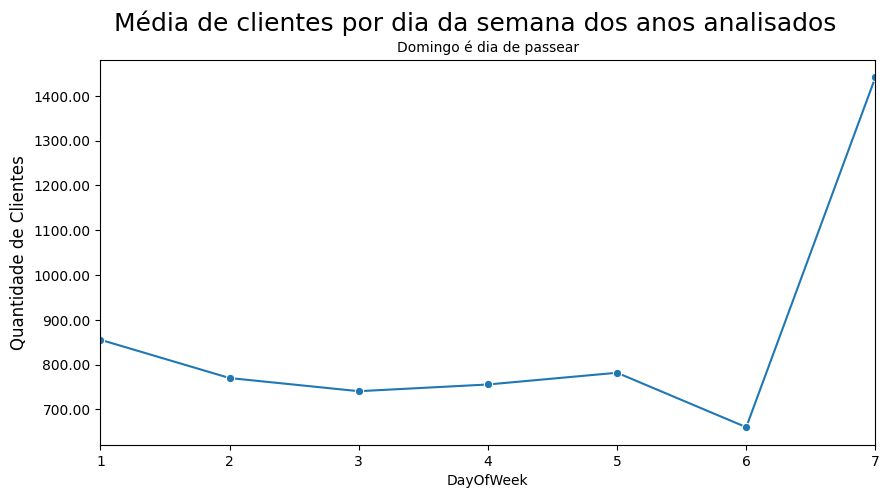

In [122]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(df_final.groupby(['DayOfWeek'])[['Customers']].mean(), marker = 'o', markersize = 6)
plt.suptitle('Média de clientes por dia da semana dos anos analisados', fontsize = 18);
plt.title('Domingo é dia de passear', fontsize = 10);
plt.legend().remove()
ax.set_xlim(1, 7);
ax.set_xticks(range(1,8));
ax.set_ylabel('Quantidade de Clientes', fontsize = 12);
ax.yaxis.set_major_formatter('{x:1.2f}')

#### Tratamento para o modelo

In [123]:
from prophet import Prophet

In [124]:
def previsao_vendas(store_id, dataframe, feriado, periodo):
    dataframe = dataframe[dataframe['Store'] == store_id]
    dataframe = dataframe[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    dataframe = dataframe.sort_values(by = 'ds')

    modelo = Prophet(holidays = feriado)
    modelo.fit(dataframe)
    previsao_futura = modelo.make_future_dataframe(periods = periodo)
    previsao = modelo.predict(previsao_futura)
    figura_1 = modelo.plot(previsao, xlabel = 'Data', ylabel = 'Vendas')
    figura_2= modelo.plot_components(previsao)

    return dataframe, previsao

In [125]:
df_final.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


In [126]:
df_final = df_final[df_final['Store'] == 1]

In [127]:
feriado_escolar = df_final[df_final['SchoolHoliday'] == 1].loc[:, 'Date'].values

In [128]:
feriado_escolar = pd.DataFrame({'ds': feriado_escolar,
                                 'holiday': 'school_holiday'})

In [129]:
feriado_escolar

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
155,2013-01-07,school_holiday
156,2013-01-05,school_holiday
157,2013-01-04,school_holiday
158,2013-01-03,school_holiday


In [130]:
feriado_estadual = df_final[(df_final['StateHoliday'] == 'a') | (df_final['StateHoliday'] == 'b' ) |
          (df_final['StateHoliday'] == 'c')].loc[:, 'Date'].values

In [131]:
feriado_estadual = pd.DataFrame({'ds': feriado_estadual,
                                 'holiday': 'state_holiday'})

In [132]:
feriado_estadual

,ds,holiday


In [133]:
feriado_estadual_escolar = pd.concat((feriado_estadual, feriado_escolar))

18:13:47 - cmdstanpy - INFO - Chain [1] start processing
18:13:48 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jean_\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jean_\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\jean_\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties

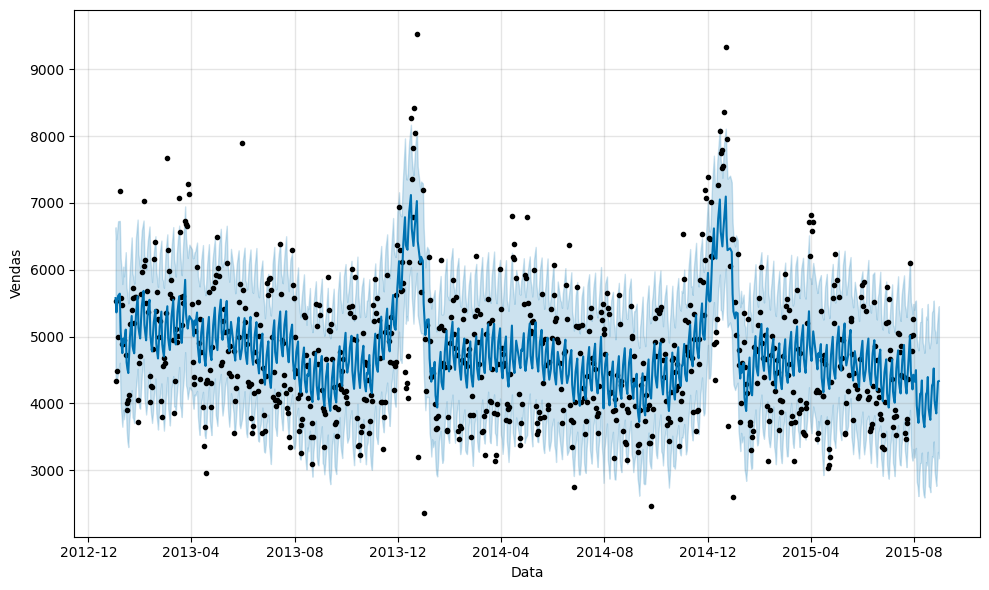

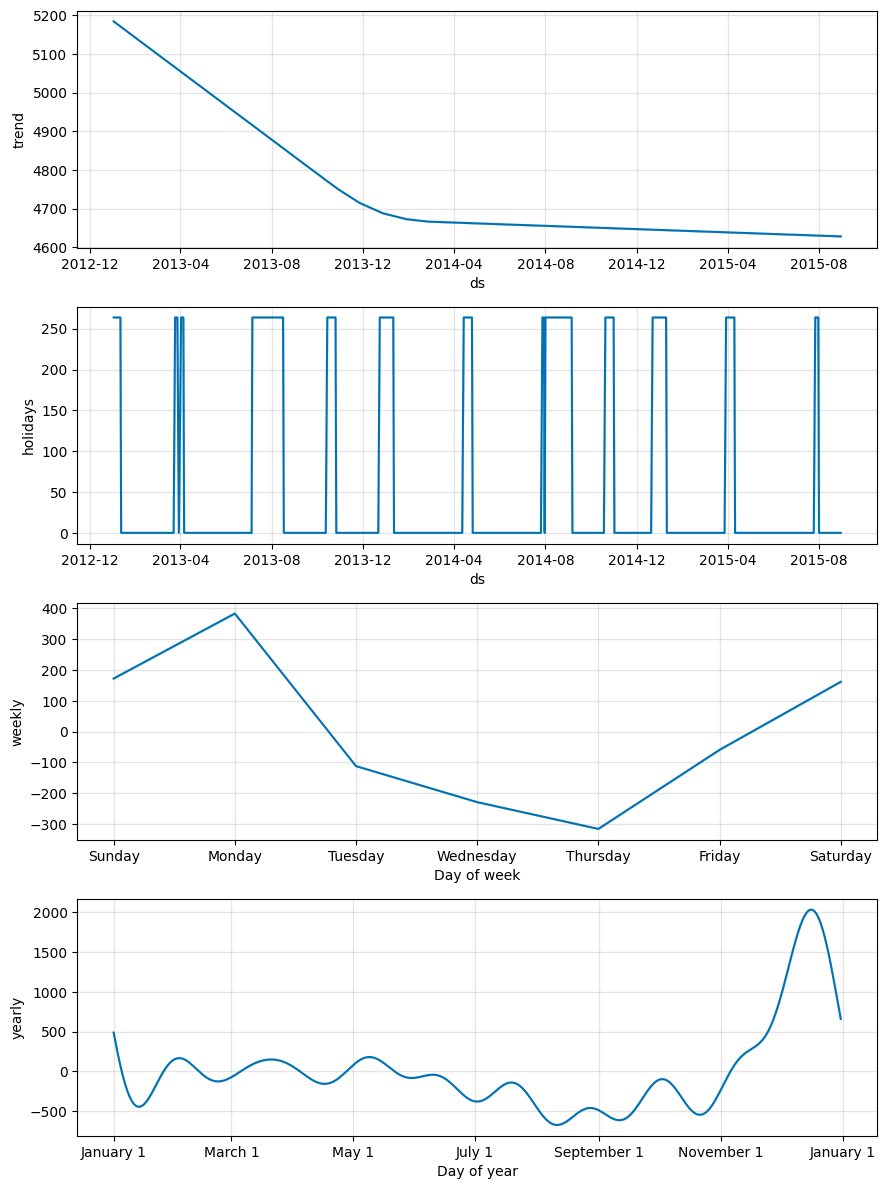

In [135]:
df_original, df_predito = previsao_vendas(1, df_final, feriado_estadual_escolar, 30);

In [137]:
df_predito.sort_values('ds', ascending = False)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
810,2015-08-30,4628.116228,3177.535406,5453.015418,4627.102529,4629.050028,-295.192703,-295.192703,-295.192703,0.000000,...,172.021168,172.021168,172.021168,-467.213871,-467.213871,-467.213871,0.0,0.0,0.0,4332.923525
809,2015-08-29,4628.185524,3271.545551,5344.054235,4627.247854,4629.079552,-301.136412,-301.136412,-301.136412,0.000000,...,161.371259,161.371259,161.371259,-462.507672,-462.507672,-462.507672,0.0,0.0,0.0,4327.049111
808,2015-08-28,4628.254820,3056.963754,5181.935716,4627.406721,4629.073332,-520.569401,-520.569401,-520.569401,0.000000,...,-59.410517,-59.410517,-59.410517,-461.158883,-461.158883,-461.158883,0.0,0.0,0.0,4107.685420
807,2015-08-27,4628.324116,2764.352366,4900.713952,4627.541088,4629.095915,-779.072896,-779.072896,-779.072896,0.000000,...,-315.791554,-315.791554,-315.791554,-463.281342,-463.281342,-463.281342,0.0,0.0,0.0,3849.251220
806,2015-08-26,4628.393412,2865.555515,5058.404283,4627.665384,4629.099539,-697.795104,-697.795104,-697.795104,0.000000,...,-228.930464,-228.930464,-228.930464,-468.864640,-468.864640,-468.864640,0.0,0.0,0.0,3930.598308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2013-01-07,5176.729850,4607.214259,6729.689857,5176.729850,5176.729850,464.632180,464.632180,464.632180,263.746474,...,382.845226,382.845226,382.845226,-181.959519,-181.959519,-181.959519,0.0,0.0,0.0,5641.362030
3,2013-01-05,5179.631795,4467.951169,6725.639706,5179.631795,5179.631795,428.535566,428.535566,428.535566,263.746474,...,161.371259,161.371259,161.371259,3.417833,3.417833,3.417833,0.0,0.0,0.0,5608.167360
2,2013-01-04,5181.082767,4366.148783,6596.943780,5181.082767,5181.082767,316.486559,316.486559,316.486559,263.746474,...,-59.410517,-59.410517,-59.410517,112.150602,112.150602,112.150602,0.0,0.0,0.0,5497.569326
1,2013-01-03,5182.533740,4327.374676,6458.217548,5182.533740,5182.533740,178.077010,178.077010,178.077010,263.746474,...,-315.791554,-315.791554,-315.791554,230.122090,230.122090,230.122090,0.0,0.0,0.0,5360.610750


In [140]:
# df_final.to_excel('faturamento.xlsx')
# df_predito.to_excel('previsao.xlsx')

In [141]:
def previsao_vendas_s_feriado(store_id, dataframe, periodo):
    dataframe = dataframe[dataframe['Store'] == store_id]
    dataframe = dataframe[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
    dataframe = dataframe.sort_values(by = 'ds')

    modelo = Prophet()
    modelo.fit(dataframe)
    previsao_futura = modelo.make_future_dataframe(periods = periodo)
    previsao = modelo.predict(previsao_futura)
    figura_1 = modelo.plot(previsao, xlabel = 'Data', ylabel = 'Vendas')
    figura_2= modelo.plot_components(previsao)

    return dataframe, previsao

23:32:18 - cmdstanpy - INFO - Chain [1] start processing
23:32:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\jean_\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jean_\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
C:\Users\jean_\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties

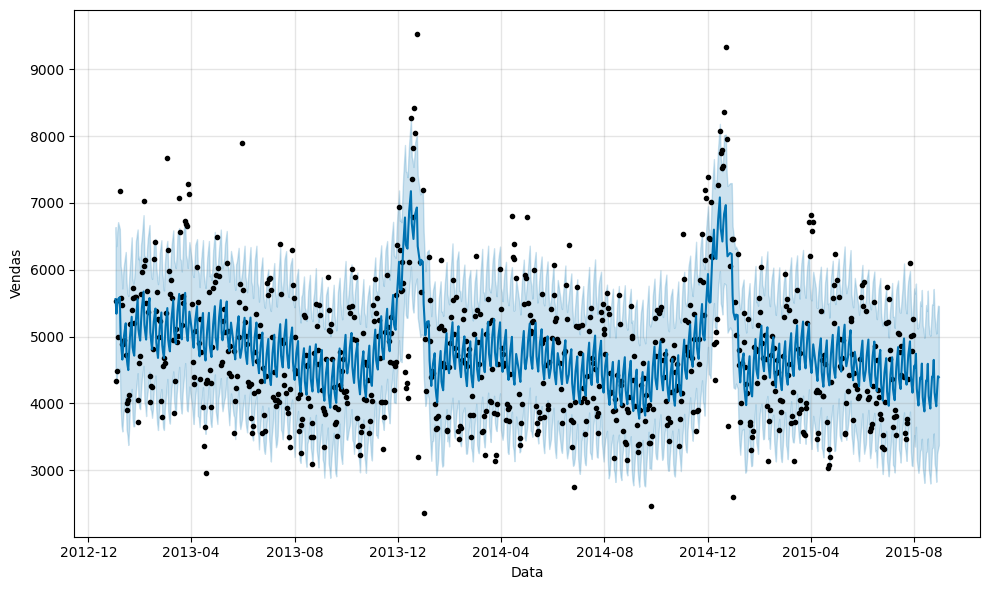

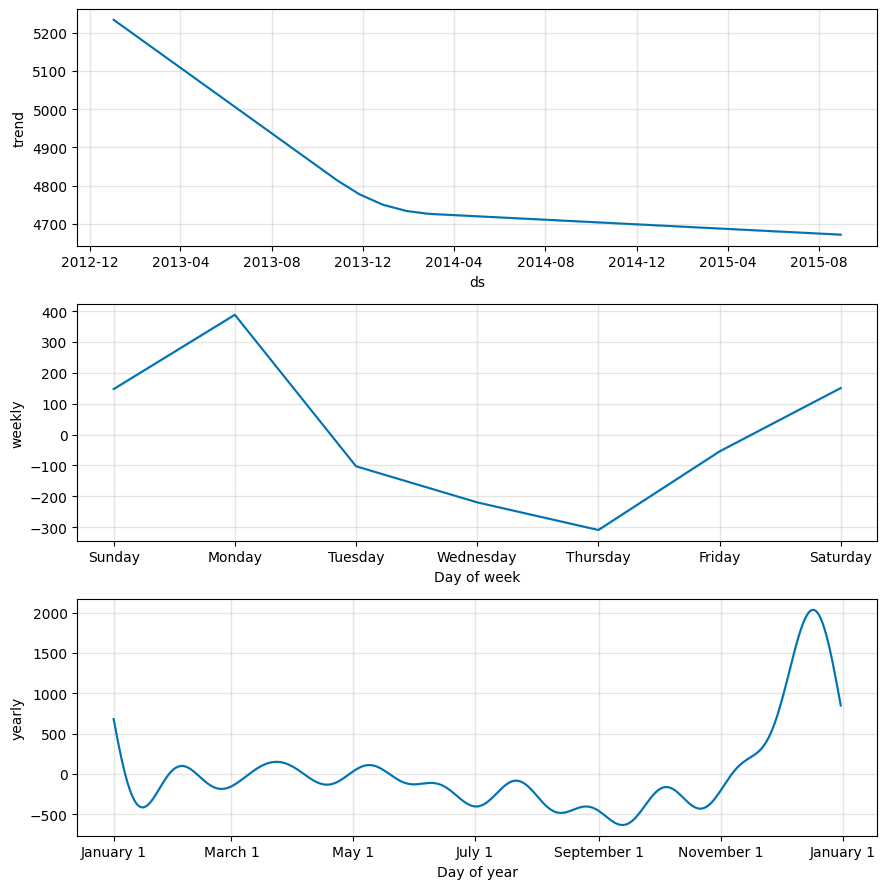

In [142]:
df_original, df_predito = previsao_vendas_s_feriado(1, df_final, 30);

In [143]:
# df_predito.to_excel('previsao_pessimista.xlsx')